<a href="https://colab.research.google.com/github/sumana-2705/Predicting-Student-Performance-Index/blob/main/Predicting%20Student%20performance%20index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Student Performance


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

**Objective**: Develop a Multiple Regression model to predict Student Performance Index.

**Features**: Hours Studied, Previous Scores, Sleep Hours, Number of practice papers practiced, Extracurricular Activities.

**Model Development**: Employ Multiple Variable Linear Regression techniques to establish a predictive model. The model will learn the relationship between these input features and the student's performance metric.


## Preparing Data

In [18]:
data = pd.read_csv('/content/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Exploratory Data Analysis

In [6]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


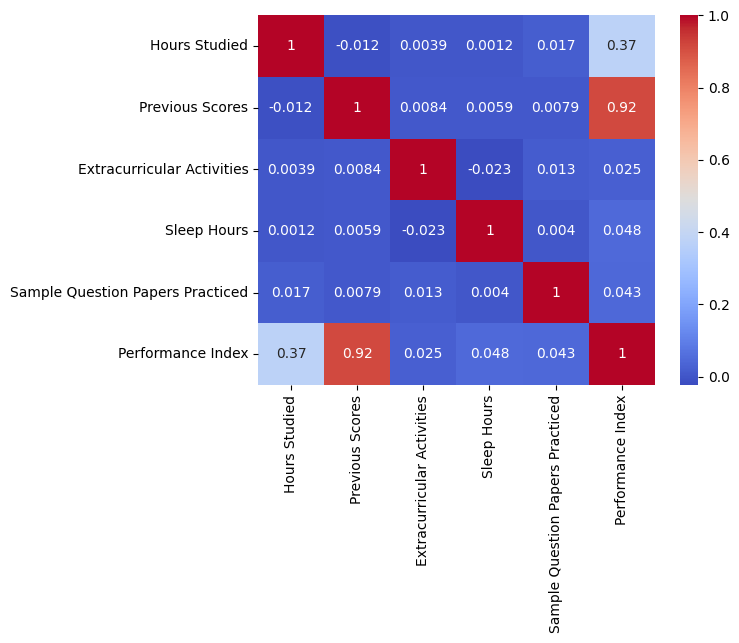

In [25]:
df_encoded = data.copy()

# Encoding Categorical Column
df_encoded['Extracurricular Activities'] = df_encoded['Extracurricular Activities'].map({'Yes':1, 'No':0})


sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()

# Previous Scores, Hours Studied has strong correlation with Performance index

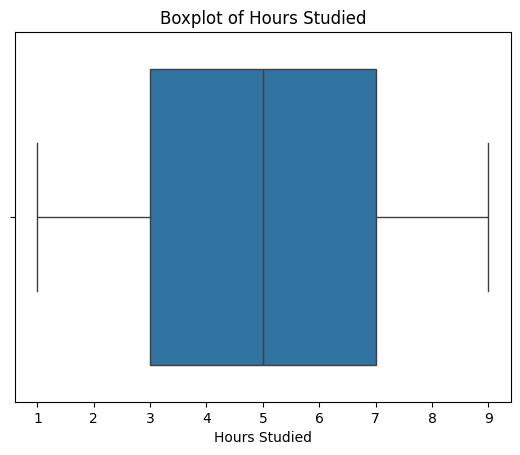

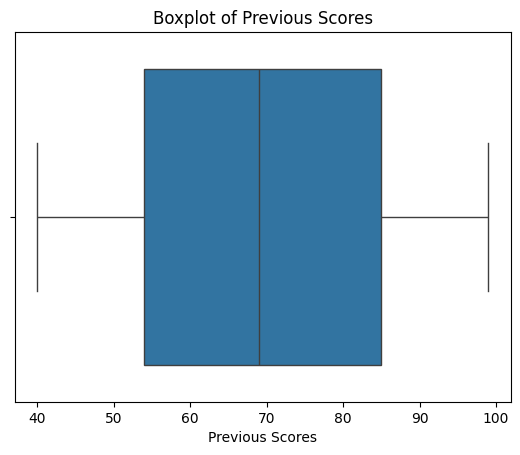

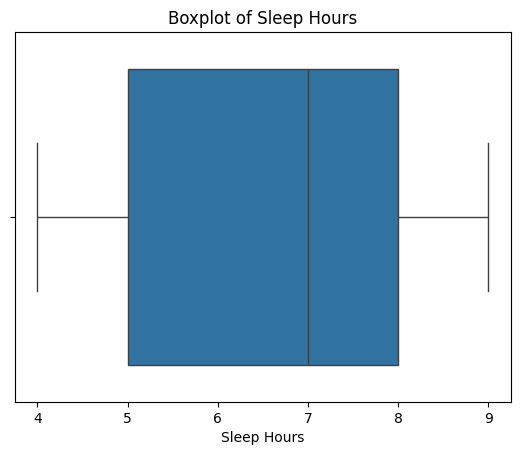

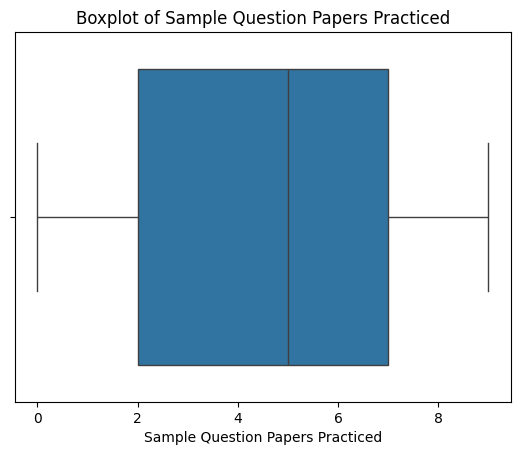

In [16]:
num_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
            'Sample Question Papers Practiced']

for col in num_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### Univariate Analysis

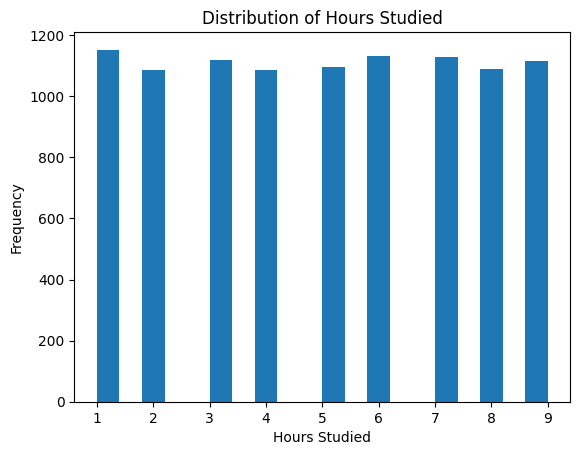

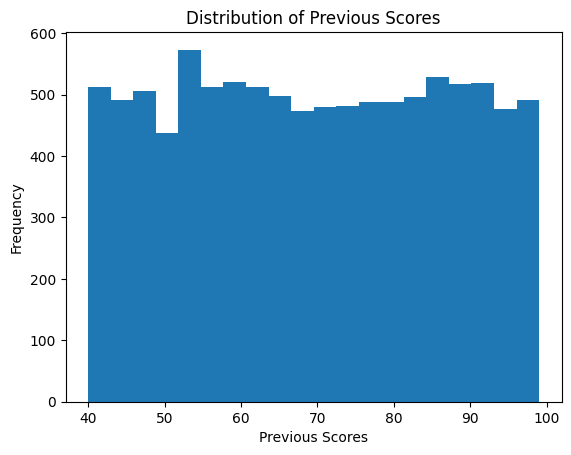

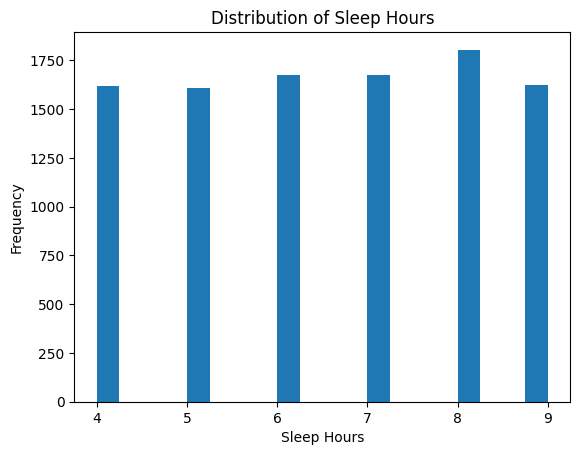

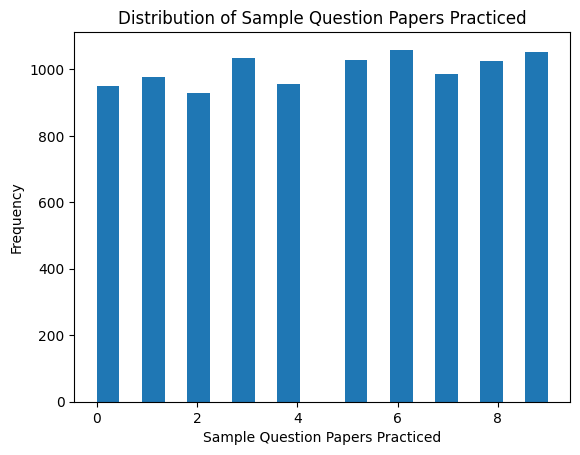

In [13]:
for col in num_cols:
    plt.figure()
    plt.hist(x[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Bivariate Analysis

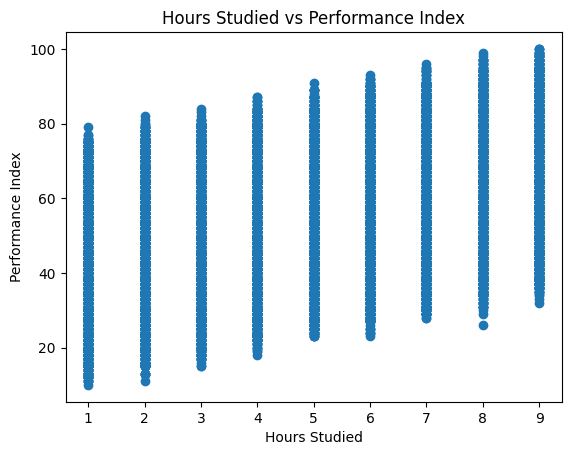

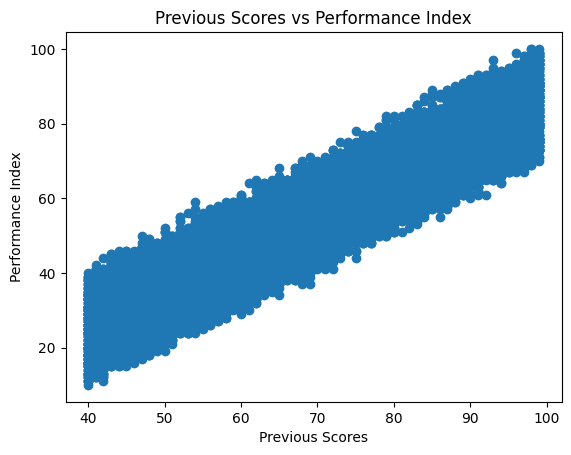

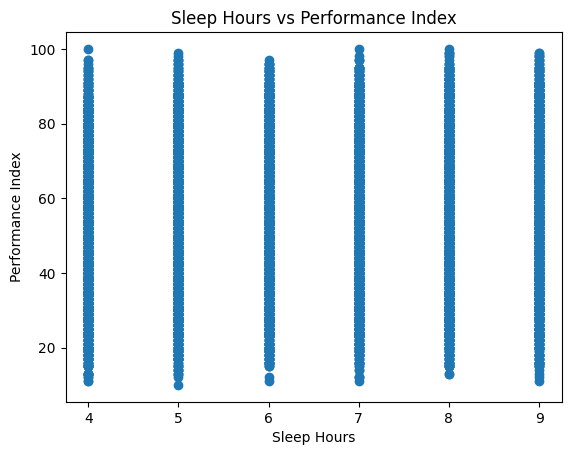

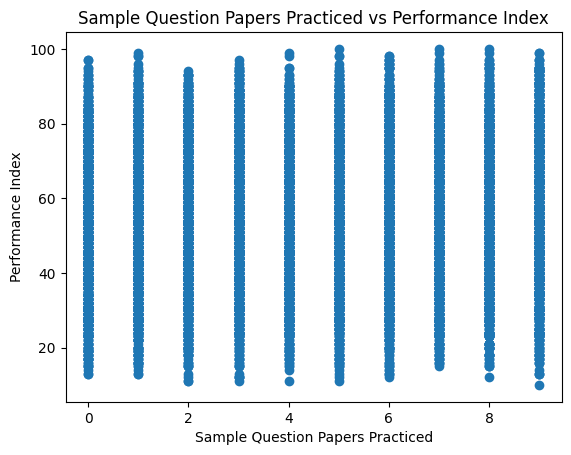

In [22]:
target = "Performance Index"  # change to your target name

for col in num_cols:
    plt.figure()
    plt.scatter(data[col], data[target])
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


## Dividing Data (train set, test set)

- Training Set - 80%
- Test Set - 20%

Dividing the dataset into training and test sets is essential for evaluating model performance. The training set trains the model and the test set provides an unbiased performance estimate on new data. This approach helps identify and reduce high bias or variance.

In [26]:
# Encode categorical column
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})

In [27]:
X = data[['Hours Studied',
        'Previous Scores',
        'Sleep Hours',
        'Sample Question Papers Practiced',
        'Extracurricular Activities']]

y = data['Performance Index']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

## Model Prediction (f_wb)



The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`




In [30]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

LinearRegression()

In [31]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,Hours Studied,2.852484
1,Previous Scores,1.016988
2,Sleep Hours,0.476941
3,Sample Question Papers Practiced,0.191831
4,Extracurricular Activities,0.608617


## Evaluating Model Performance

In [32]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Model Performance:
R² Score: 0.9889832909573145
Mean Absolute Error: 1.611121346312304
Mean Squared Error: 4.082628398521851
Root Mean Squared Error: 2.020551508505005
